## $K$-nearest neighbors classification with `sklearn`

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt

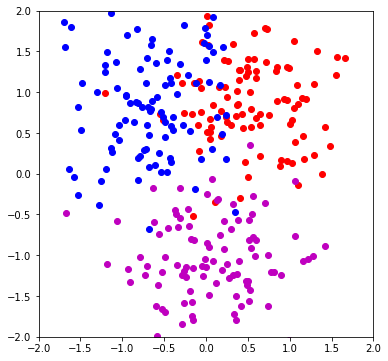

In [24]:
# Generate a mixture of two Gaussians.
X0 = np.random.multivariate_normal([0.5, 0.5*np.sqrt(3)], 0.3*np.identity(2), size=100)
X1 = np.random.multivariate_normal([-0.5, 0.5*np.sqrt(3)], 0.3*np.identity(2), size=100)
X2 = np.random.multivariate_normal([0, -1], 0.3*np.identity(2), size=100)
X = np.concatenate([X0, X1, X2])

# Assign class labels
y0 = np.zeros(len(X0))
y1 = np.ones(len(X1))
y2 = 2*np.ones(len(X2))
y = np.concatenate([y0, y1, y2])

# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Plot clouds
plt.figure(figsize=(6, 6))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(X0[:,0], X0[:,1], 'ro')
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'mo')

misclassification rate: 0.19


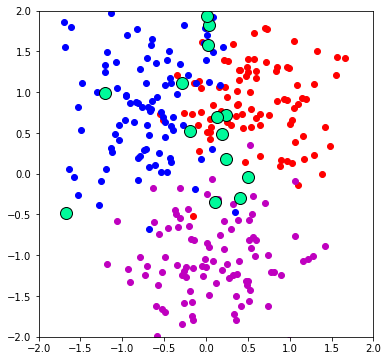

In [25]:
# Fit Gaussian naive bayes model on training data, predict on test data.
C = KNeighborsClassifier(n_neighbors=5)
C.fit(X_train, y_train)
y_ = C.predict(X_test)
mis_rate = sum(y_ != y_test)/len(y_)
print(f"misclassification rate: {mis_rate:.2f}")

# Identify misclassifications.
i_bad = (y_ != y_test)
X_bad = X_test[i_bad, :]

# Plot clouds with misclassifications emphasized.
plt.figure(figsize=(6, 6))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(X0[:,0], X0[:,1], 'ro')
plt.plot(X1[:,0], X1[:,1], 'bo')
plt.plot(X2[:,0], X2[:,1], 'mo')
plt.plot(X_bad[:,0], X_bad[:,1], 'o', color="mediumspringgreen", markersize=12, markeredgecolor='k')
plt.show()